In [1]:
# install qiskit
# !pip install qiskit
from qiskit import *

In [2]:
# Initialize circuit with two qubits
circuit = QuantumCircuit (2,2) # (2: two qubits, 2: two classical bits)

"""
# Another option of creating same circuit above:
quantum_register = QuantumRegister(2) # 2: two qubits
classical_register = ClassicalRegister(2) # 2: two bits
circuit = QuantumCircuit(quantum_register, classical_register)
"""

'\n# Another option of creating same circuit above:\nquantum_register = QuantumRegister(2) # 2: two qubits\nclassical_register = ClassicalRegister(2) # 2: two bits\ncircuit = QuantumCircuit(quantum_register, classical_register)\n'

In [3]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

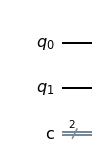

In [4]:
%matplotlib inline
circuit.draw(output='mpl') # mpl: matplotlib

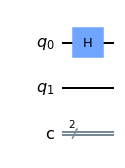

In [5]:
# Apply Hadamard gate on first qubit
circuit.h(0)
circuit.draw(output='mpl')

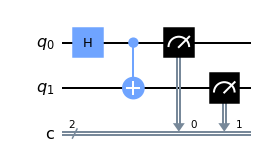

In [7]:
# Apply CNOT gate
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
# Observe
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [8]:
# run on a simulator
# first specify simulator name
simulator = Aer.get_backend('qasm_simulator')

In [10]:
# now run it and get result
result = execute(circuit, backend = simulator).result()

In [11]:
from qiskit.visualization import plot_histogram

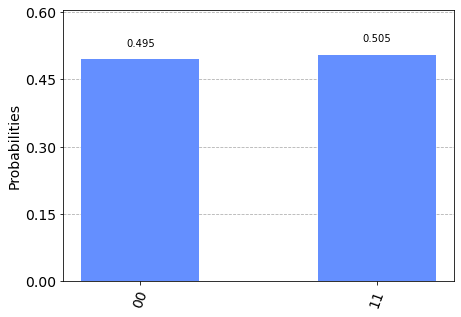

In [12]:
plot_histogram(result.get_counts(circuit))

### Let's run on actual quantum computer

In [13]:
IBMQ.save_account(open('../apikey.txt','r').read())
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider('ibm-q')

In [15]:
quantum_computer = provider.get_backend('ibmq_lima')

In [16]:
import qiskit.tools.jupyter
%qiskit_job_watcher
job = execute(circuit, backend = quantum_computer)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [17]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


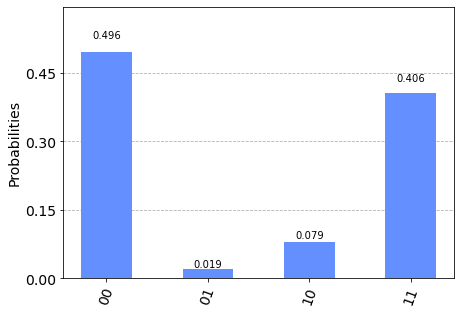

In [18]:
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

|01> and |10> strengths are due to noise

In [19]:
%qiskit_disable_job_watcher